<a href="https://colab.research.google.com/github/xtianu/docencia/blob/main/UT/Test/Tirana_CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

Shape : (303, 384)
Pixel range : 1 → 252


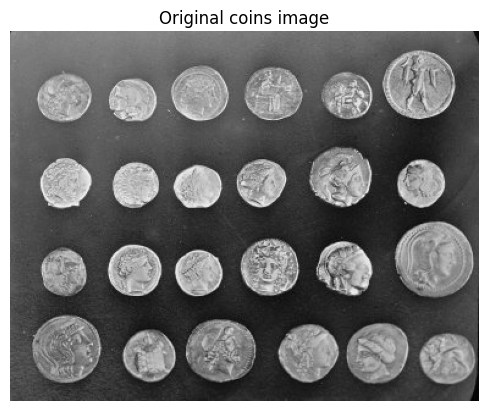

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Load skimage's built-in test image
coins = data.coins()   

# Basic info
print("Shape :", coins.shape)
print("Pixel range :", coins.min(), "→", coins.max())

# Display
plt.imshow(coins, cmap="gray")
plt.title("Original coins image")
plt.axis("off")
plt.show()

The image is 303 × 384 pixels, with 8-bit grayscale values ranging roughly 1–252.

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

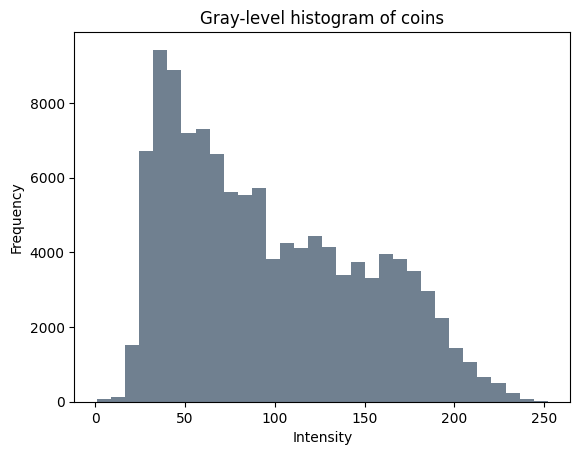

In [ ]:
# histogram of the image
plt.hist(coins.ravel(), bins=32, color="slategray")
plt.title("Gray-level histogram of coins")
plt.xlabel("Intensity"); plt.ylabel("Frequency")
plt.show()

# Explanation
The tall, narrow peak at low intensities corresponds to the dark, felt-covered background.
The broader hump at mid/high intensities represents coin surfaces, which are brighter and textured.
A tiny shoulder near the upper end reflects specular highlights on a few shiny coins.

## 3. Applied noise to the image and use the correct function to erase the noise.

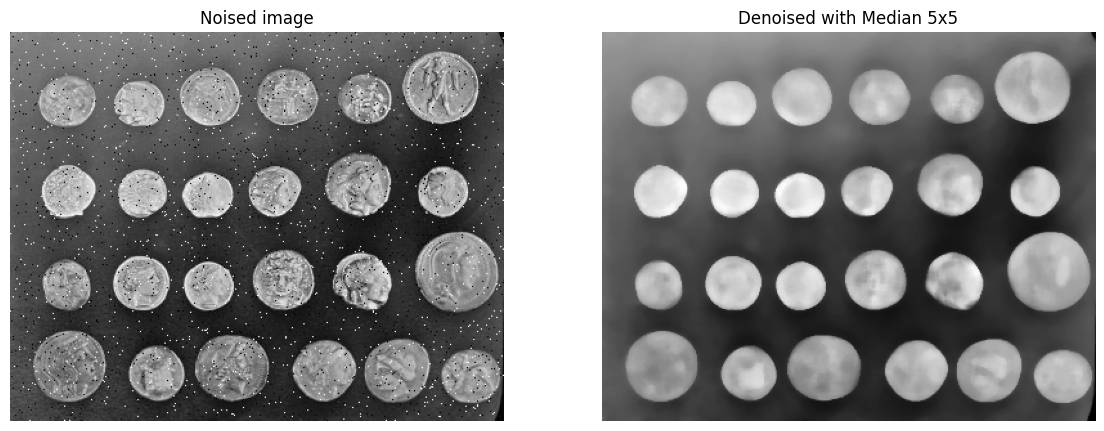

In [81]:
from skimage import data
from skimage import img_as_ubyte
from skimage.morphology import disk
from skimage.filters import median
## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(coins.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(data.coins())
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Noised image')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

# plot_comparison(coins,noisy_image,'Salt & Pepper noise')
# plt.savefig('Noisy.png')

# Median filter to erase the noise

img = img_as_ubyte(noisy_image)
sel5 = disk(5) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Denoised with Median 5x5')
plt.savefig('median.png')


Applied Salt and Pepper noise. Median filtering effectively suppresses isolated bright/dark speckles while preserving coin edges.

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

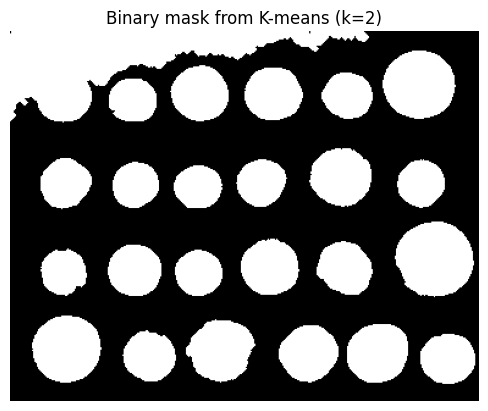

In [87]:
# Flatten → cluster
X = coins.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X).reshape(coins.shape)

# Decide which label is "coin" ⇒ the brighter cluster
coin_label = 1 if coins[labels == 1].mean() > coins[labels == 0].mean() else 0
binary = labels == coin_label            # True = coin

# Morphological cleanup
binary = morphology.remove_small_objects(binary, 64)
binary = ndi.binary_fill_holes(binary)
binary = morphology.opening(binary, morphology.disk(2))

plt.imshow(binary, cmap="gray")
plt.title("Binary mask from K-means (k=2)")
plt.axis("off")
plt.show()

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

Number of coins detected : 24


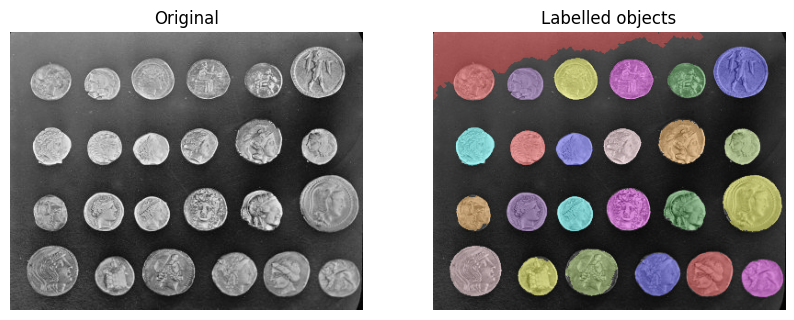

In [61]:
label_img = measure.label(binary)
regions   = measure.regionprops(label_img)
print("Number of coins detected :", len(regions))

# Side-by-side visualisation
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(coins, cmap="gray"); ax[0].set_title("Original");  ax[0].axis("off")
ax[1].imshow(color.label2rgb(label_img, image=coins, bg_label=0)); 
ax[1].set_title("Labelled objects"); ax[1].axis("off")
plt.show()

## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

<Axes: xlabel='axis_major_length', ylabel='area'>

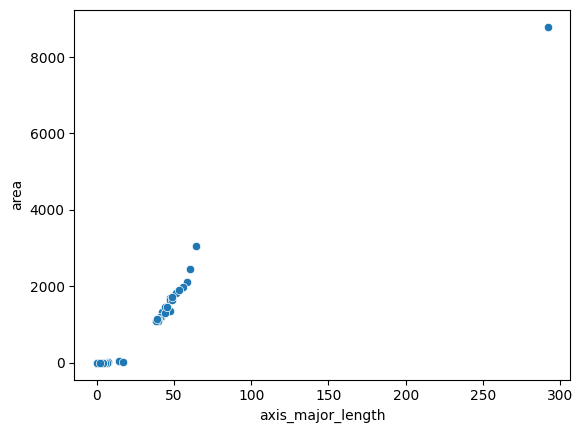

In [109]:
import pandas as pd

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df_features = pd.DataFrame(props)
df_features.head()
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

As we can see by examination we have two blobs, one below 1000 area-pixel and the other above that value and we have an average values around 2000

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [106]:
big_mask = np.isin(label_img, df.index[df["area"] > 1750] + 1)  # +1 because label 0 = background
small_mask = np.isin(label_img, df.index[df["area"] < 1750] + 1)  # +1 because label 0 = background

print("Coins with area > 1750 px² :", big_mask.max())

big_count = big_mask.max()  # True = 1, so max = count?  Actually need sum:
big_count = np.unique(label_img[big_mask]).size   # labels of big coins
print("Number of big coins :", big_count)

Coins with area > 1750 px² : True
Number of big coins : 7


##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

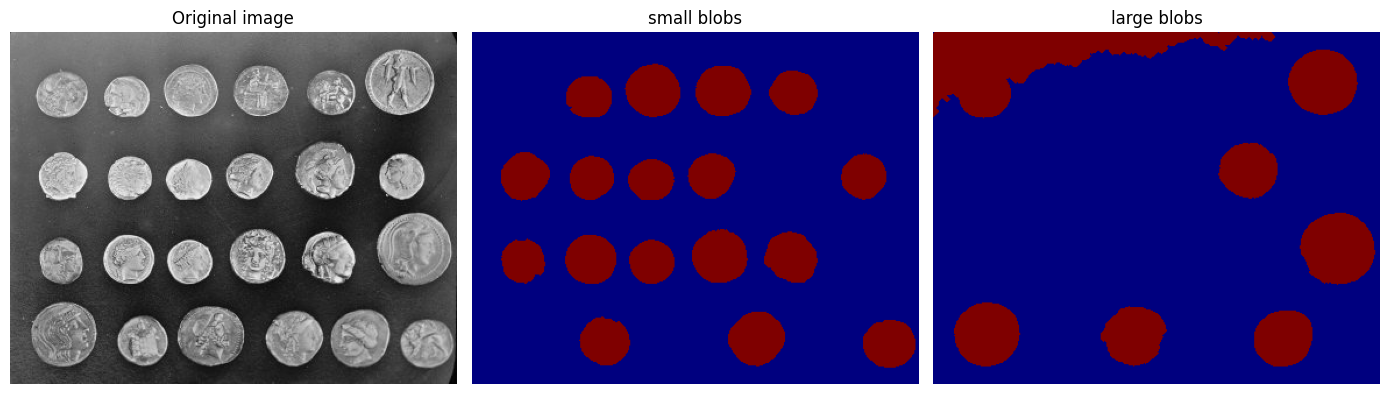

In [108]:

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(coins,cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(small_mask,cmap=plt.cm.jet)
ax[1].set_title('small blobs') # set figure title
ax[2].imshow(big_mask,cmap=plt.cm.jet)
ax[2].set_title('large blobs')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

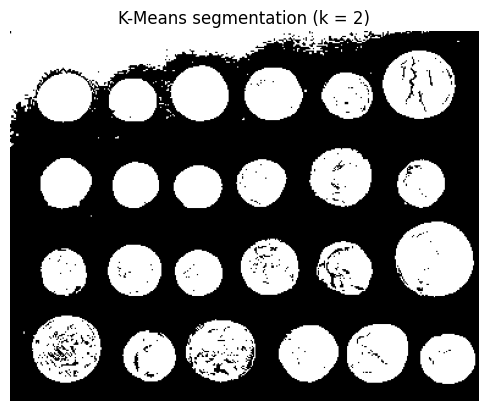

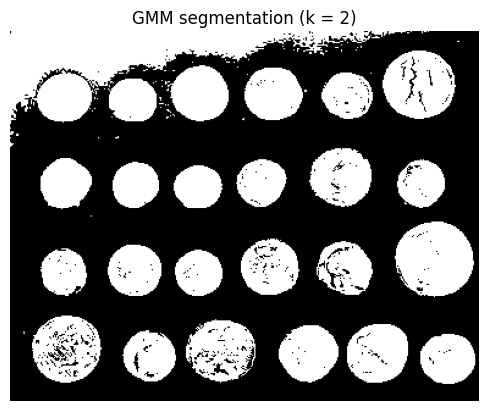

In [90]:
from sklearn.cluster import KMeans
from sklearn import mixture

# I will use the denoised imagefrom now on, because after aplying median filter it should be cleaner
X = coins.reshape(-1, 1).astype(np.float32)   # 1-D feature: intensity

labels  = KMeans(n_clusters=2, random_state=0, n_init=10).fit_predict(X)
labels_gmm = mixture.GaussianMixture(n_components=2).fit(X) # Fit a GMM model

seg     = labels.reshape(coins.shape)
seg_gmm    = labels.reshape(coins.shape)

plt.figure()
plt.imshow(seg, cmap='gray')
plt.title("K-Means segmentation (k = 2)")
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(seg_gmm, cmap='gray')
plt.title("GMM segmentation (k = 2)")
plt.axis('off')
plt.show()
     

## 10. Extract the main texture features of this image

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import img_as_ubyte
from skimage.measure import label
from skimage.filters import threshold_otsu


# Apply Otsu threshold for segmentation
thresh = threshold_otsu(coins)
bw = coins > thresh # keep lighter regions with grayscale intensities above threshold

label_image, nregions = label(bw,return_num=True)

props = regionprops(label_image, intensity_image=coins)
nregions = len(props)

props_texture = np.zeros((nregions, 5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I =  coins[minr:maxr, minc:maxc]

    # Convert to uint8
    Iu8 = img_as_ubyte(I)

    # Calculate GLCM
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    # Extract texture features
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

# Export to Excel
df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df.to_excel("Texture_features.xlsx", index=False)
df

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,254.474130,7.573417,0.310996,0.033827,0.890400
1,7.050000,1.716667,0.551310,0.206828,0.408660
2,2.461538,0.974359,0.642464,0.270145,0.887256
3,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...
91,329.792092,11.480017,0.121271,0.022586,0.905886
92,428.130762,13.391401,0.106752,0.022048,0.920394
93,740.002769,17.286268,0.094242,0.021456,0.867842
94,0.000000,0.000000,0.000000,0.000000,1.000000


## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)

The Computer Vision course was really well organized, with a great mix of theory and hands-on practice. Even though the course was short, we managed to learn a lot in a short time, which I really appreciated. The professor played a big role in this, always helpful, clear in explanations, and available whenever we had questions. Their support made a big difference and helped us get the most out of the course.